In [2]:
import tweepy                                # twitter api
import pandas as pd                          # data analysis (dataframes, read file)
import numpy as np                           # arrays and linear algebra
from IPython.display import display          # print output in tabular format
import matplotlib.pyplot as plt              # for 2D plotting
%matplotlib inline          

In [3]:
consumerkey       = 'e2zbHdO72bF3KKXPJ8kIJ8P3C'  #You have to get your own keys.
consumersecret    = 'fjb2L0jdDzeJxvodDsEQs7UVYDJty5eWfwtIDTcMk8tZ8SyBcd'
accesstoken       = '990292047885094912-KM2rqEfWgVPTXm8K3q12FY6aaYGklTG'
accesstokensecret = 'jbCJiQwCR3Bg0vGYDZvpjERxqnSMhT14v584hWtJiEb6X'

In [4]:
## Function to establish connection with twitter

def info_extraction(): 
    oauth = tweepy.OAuthHandler(consumerkey, consumersecret)  # passing consumerkey and consumersecret as paramaters to OAuthHandler attribute
    oauth.set_access_token(accesstoken, accesstokensecret)    # passing accesstoken and accesstokensecret as parameters to set_access_token
    connection = tweepy.API(oauth)                            # establishing connection using all the credentials
    return connection                                         # returning the connection back to the function



In [4]:
#list1 = ('Bitcoin','CryptoBoomNews','crypto_goat_','BitcoinCash','ethereum','Ripple')
#list1 = list(list1)

In [5]:
## Retrieving Tweets

# Tweets can be retrieved by passing required parameters
#screen_name=The name of the user for whom to return results.
#count=specifies the number of tweets that we require.
#since_id=returns id greater than from that which we're retrieving tweets from that tweet_id
#max_id=returns id less than that or equal to that id
for i in range(0,len(list1)):
    connection = info_extraction()                                                 # Calling the funtion from where we have got the connection#tweets = connection.user_timeline(screen_name="actionhappiness", count=100)    # returns collection of tweets indicated by required params
    tweets = connection.user_timeline(screen_name= list1[i], count=100)    # returns collection of tweets indicated by required params
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
    data['len']  = np.array([len(tweet.text) for tweet in tweets])      
    data['Date'] = np.array([tweet.created_at for tweet in tweets])     
    data['Likes']= np.array([tweet.favorite_count for tweet in tweets])
    data['RTs']= np.array([tweet.retweet_count for tweet in tweets])
    data.to_csv('file'+str(i)+'.csv')
        

In [5]:
## Retrieving Tweets

# Tweets can be retrieved by passing required parameters
#screen_name=The name of the user for whom to return results.
#count=specifies the number of tweets that we require.
#since_id=returns id greater than from that which we're retrieving tweets from that tweet_id
#max_id=returns id less than that or equal to that id

connection = info_extraction()                                                 # Calling the funtion from where we have got the connection
#tweets = connection.user_timeline(screen_name="actionhappiness", count=100)    # returns collection of tweets indicated by required params
tweets = connection.user_timeline(screen_name="Bitcoin", count=500)    # returns collection of tweets indicated by required params

#dir(tweets[1])   #Lists attributes of the first tweet object   

print("Number of tweets that are extracted: {}\n".format(len(tweets))) 
print("10 recent tweets:\n")
for x in tweets[:10]:
    print(x.text)                                                              # .text is for getting plain text 

Number of tweets that are extracted: 200

10 recent tweets:

@BCHcain @imkeshav @r0bbot @CoinText @BitcoinCom @YoursOrg $10 @tipprbot
@SasaJesic @CoinText @BitcoinCom @YoursOrg Nope, those are on-chain transactions. You can do the exact same demo yourself to verify.
Filipinos can now easily access Bitcoin Cash—https://t.co/3oT3Su1qri adds BCH support to their wallet

https://t.co/33yE0AyjsB
@Lone_Wanderer87 @CoinText @BitcoinCom @YoursOrg Average transaction fee on BCH is $0.001
Cool demonstration of how quick &amp; easy it is to use #BitcoinCash. In this video BCH is sent from a @CoinText wallet… https://t.co/wGt7zR3WAM
Current fees on the BTC network are 11,414x higher than fees on the BCH network. https://t.co/aRRTuIHoTS
@ovrclockedjesus Well for starters, it's a Twitter account, not a cryptocurrency.
@C__Freire Just posting some data.
There is only a 1% chance of successfully routing a $67 payment on the lightning network

https://t.co/GOkxta41Fl https://t.co/Zqrevb09aA
Chainbet Pr

In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
print(data.head(10))

                                              Tweets
0  @BCHcain @imkeshav @r0bbot @CoinText @BitcoinC...
1  @SasaJesic @CoinText @BitcoinCom @YoursOrg Nop...
2  Filipinos can now easily access Bitcoin Cash—h...
3  @Lone_Wanderer87 @CoinText @BitcoinCom @YoursO...
4  Cool demonstration of how quick &amp; easy it ...
5  Current fees on the BTC network are 11,414x hi...
6  @ovrclockedjesus Well for starters, it's a Twi...
7                 @C__Freire Just posting some data.
8  There is only a 1% chance of successfully rout...
9  Chainbet Protocol Adds Trustless Multiplayer B...


In [17]:

data['len']  = np.array([len(tweet.text) for tweet in tweets])      
data['Date'] = np.array([tweet.created_at for tweet in tweets])     
data['Likes']= np.array([tweet.favorite_count for tweet in tweets])
data['RTs']= np.array([tweet.retweet_count for tweet in tweets])
data['User']=np.array([tweet.user for tweet in tweets])

In [18]:
display(data[1:5]) 


,Tweets,len,Date,Likes,RTs,User,Sentiment
1,@SasaJesic @CoinText @BitcoinCom @YoursOrg Nop...,132,2018-06-22 08:09:51,7,2,User(_api=<tweepy.api.API object at 0x00000000...,1
2,Filipinos can now easily access Bitcoin Cash—h...,126,2018-06-22 04:52:00,231,72,User(_api=<tweepy.api.API object at 0x00000000...,1
3,@Lone_Wanderer87 @CoinText @BitcoinCom @YoursO...,89,2018-06-22 04:41:40,5,2,User(_api=<tweepy.api.API object at 0x00000000...,-1
4,Cool demonstration of how quick &amp; easy it ...,144,2018-06-22 03:31:19,314,132,User(_api=<tweepy.api.API object at 0x00000000...,1


In [6]:
## Retrieving Tweets

# Tweets can be retrieved by passing required parameters
#screen_name=The name of the user for whom to return results.
#count=specifies the number of tweets that we require.
#since_id=returns id greater than from that which we're retrieving tweets from that tweet_id
#max_id=returns id less than that or equal to that id
#for i in range(0,len(list1)):
    #connection = info_extraction()                                                 # Calling the funtion from where we have got the connection#tweets = connection.user_timeline(screen_name="actionhappiness", count=100)    # returns collection of tweets indicated by required params
    #tweets = connection.user_timeline(screen_name= list1[i], count=100)    # returns collection of tweets indicated by required params
    #data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
    #data['len']  = np.array([len(tweet.text) for tweet in tweets])      
    #data['Date'] = np.array([tweet.created_at for tweet in tweets])     
    #data['Likes']= np.array([tweet.favorite_count for tweet in tweets])
    #data['RTs']= np.array([tweet.retweet_count for tweet in tweets])
    #data.to_csv('file'+str(i)+'.csv')
    
#dir(tweets[1])   #Lists attributes of the first tweet object   
#print("Number of tweets that are extracted: {}\n".format(len(tweets))) 
#print("10 recent tweets:\n")
#for x in tweets[:2]:
    #print(x.text)    

Number of tweets that are extracted: 100

10 recent tweets:

I'm grateful to the people of K'taka for reposing faith in BJP and I'm indebted to the Karyarkartas &amp; leaders who w… https://t.co/ZHUK6B2aKv
ಬಿಜೆಪಿ ಬೆಂಬಲಿಸಿದ ನಾಡಿನ ಜನತೆಗೆ ನಾನು ಆಭಾರಿ. ಅತಿ ದೊಡ್ಡ ಪಕ್ಷವಾಗಿ ಹೊರಹೊಮ್ಮಲು ಶ್ರಮಿಸಿದ ಕಾರ್ಯಕರ್ತರಿಗೆ ಕೃತಜ್ಞತೆಗಳು. ಪ್ರಧಾನಿ… https://t.co/VUP7prDtLs


In [11]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


def get_polarity(tweet):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [12]:
data['Sentiment'] = np.array([ get_polarity(tweet) for tweet in data['Tweets'] ])

In [13]:
## Print top 10 tweets and notice Sentiment field added at the end of each record
print(data.head(10))

                                              Tweets  len                Date  \
0  @BCHcain @imkeshav @r0bbot @CoinText @BitcoinC...   72 2018-06-22 08:10:07   
1  @SasaJesic @CoinText @BitcoinCom @YoursOrg Nop...  132 2018-06-22 08:09:51   
2  Filipinos can now easily access Bitcoin Cash—h...  126 2018-06-22 04:52:00   
3  @Lone_Wanderer87 @CoinText @BitcoinCom @YoursO...   89 2018-06-22 04:41:40   
4  Cool demonstration of how quick &amp; easy it ...  144 2018-06-22 03:31:19   
5  Current fees on the BTC network are 11,414x hi...  104 2018-06-21 06:05:02   
6  @ovrclockedjesus Well for starters, it's a Twi...   81 2018-06-21 04:29:31   
7                 @C__Freire Just posting some data.   34 2018-06-21 04:29:08   
8  There is only a 1% chance of successfully rout...  137 2018-06-21 04:22:41   
9  Chainbet Protocol Adds Trustless Multiplayer B...  113 2018-06-19 07:19:55   

   Likes  RTs                                               User  Sentiment  
0      9    1  User(_api=<twee

In [14]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]      

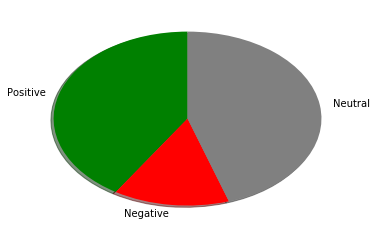

In [15]:
colors = ['green', 'red', 'grey']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

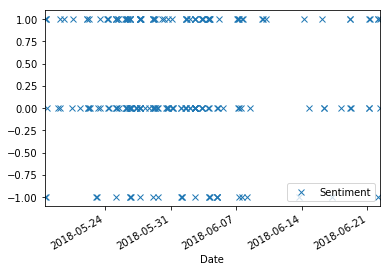

In [16]:
data.plot(x='Date',y='Sentiment',style='x')
plt.show()